# Inspecting embeddings vectors by means of PCA

### Performing PCA without objects labeled None, will probably result in easier-to-see clusters

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ast import literal_eval

In [2]:
data = pd.read_csv('train_data-CLEANED-7.csv', sep = ';', converters={"embeddings_uncsd-BERT": literal_eval, "embeddings_csd-BERT": literal_eval, "embeddings_USE": literal_eval, "embeddings_MiniLM-6": literal_eval, "embeddings_MiniLM-12": literal_eval, "embeddings_Doc2Vec-enwiki": literal_eval, "embeddings_Doc2Vec-apnews": literal_eval, "embeddings_IS-GloVe": literal_eval, "embeddings_IS-FastText": literal_eval, "embeddings_uncsd-BERT-1024": literal_eval}, dtype={'affil_index': 'int32'})
data.drop(columns = ['Unnamed: 0'], inplace = True)
#keep only those not labeled as None
data = data[data['labels'] != 'None']
data

,part,labels,affil_index,embeddings_csd-BERT,embeddings_uncsd-BERT,embeddings_uncsd-BERT-1024,embeddings_Doc2Vec-enwiki,embeddings_Doc2Vec-apnews,embeddings_IS-GloVe,embeddings_IS-FastText,embeddings_USE,embeddings_MiniLM-6,embeddings_MiniLM-12
2,Heidelberg University,Institution,0,"[-0.7138798236846924, 0.3940200209617615, 0.99...","[-0.8486786484718323, -0.2455383986234665, 0.4...","[-0.8594508767127991, -0.8380329608917236, 0.9...","[-0.0006516524590551853, -0.001572769018821418...","[-0.0006516524590551853, -0.001572769018821418...","[0.04793785512447357, 0.11302205175161362, -0....","[0.007468888536095619, -0.1303471326828003, 0....","[0.025743847712874413, 0.07257843762636185, -0...","[-0.019170325249433517, 0.03432709351181984, -...","[0.034776169806718826, 0.08649962395429611, -0..."
4,69120 Heidelberg,City,0,"[-0.6838078498840332, 0.43467605113983154, 0.9...","[-0.8710287809371948, -0.18979620933532715, 0....","[-0.13470880687236786, -0.4623102843761444, -0...","[0.0016177125507965684, 0.000449529878096655, ...","[0.0016177125507965684, 0.000449529878096655, ...","[0.04793785884976387, -0.019109880551695824, -...","[0.007468888536095619, -0.1303471475839615, 0....","[0.031027894467115402, 0.0562385655939579, -0....","[-0.044027894735336304, 0.038785725831985474, ...","[-0.004203577060252428, 0.06125829741358757, -..."
5,Germany.,Country,0,"[-0.7979846000671387, 0.5943405628204346, 0.99...","[-0.9390044808387756, -0.38498663902282715, -0...","[-0.9800318479537964, -0.9295092225074768, 0.9...","[0.0010621276451274753, 0.0005723817739635706,...","[0.0010621276451274753, 0.0005723817739635706,...","[0.07264827936887741, -0.043075043708086014, -...","[0.007468888536095619, -0.10363795608282089, -...","[-0.023617804050445557, -0.0024094292894005775...","[0.05658335983753204, 0.08639846742153168, -0....","[0.015248356387019157, 0.06312239170074463, -0..."
7,Chungnam National University,Institution,1,"[-0.6064826846122742, 0.4104090631008148, 0.99...","[-0.9152734875679016, -0.4485287666320801, -0....","[-0.9983353018760681, -0.9979301691055298, 1.0...","[-0.00037310022162273526, 0.000144456818816252...","[-0.00037310022162273526, 0.000144456818816252...","[0.03631197661161423, 0.14613397419452667, -0....","[0.007468888536095619, -0.08870925009250641, 0...","[-0.0037795312236994505, -0.002903451444581151...","[-0.06981688737869263, 0.0368032343685627, -0....","[0.016548428684473038, 0.08779944479465485, 0...."
8,Daejeon 305-764,City,1,"[-0.6253864169120789, 0.3985569179058075, 0.99...","[-0.8401896357536316, -0.3764529228210449, -0....","[0.5046712756156921, -0.748023509979248, 0.960...","[-0.0013195741921663284, 0.0008330961572937667...","[-0.0013195741921663284, 0.0008330961572937667...","[-0.01049832720309496, -0.08939896523952484, -...","[0.007468889933079481, -0.14438317716121674, -...","[-0.030728161334991455, 0.008898631669580936, ...","[-0.1833076924085617, 0.003943566232919693, -0...","[-0.07037623971700668, 0.06238029524683952, -0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,New Delhi 110062,City,600,"[-0.7059003710746765, 0.4446127712726593, 0.99...","[-0.864574670791626, -0.18162089586257935, -0....","[0.8763378858566284, -0.4353349208831787, 0.34...","[0.0016032123239710927, -0.0004291229997761547...","[0.0016032123239710927, -0.0004291229997761547...","[0.08408751338720322, -0.021293284371495247, 0...","[0.007468888536095619, -0.12355620414018631, -...","[0.019529661163687706, 0.02566276118159294, -0...","[-0.09952620416879654, -0.01794597879052162, -...","[-0.0684361532330513, 0.0024204025976359844, 0..."
2992,India.,Country,600,"[-0.8424339890480042, 0.6388465166091919, 0.99...","[-0.9591183066368103, -0.44601452350616455, -0...","[-0.9472164511680603, -0.9264965653419495, 0.9...","[-0.0007508505368605256, -0.000230572666623629...","[-0.0007508505368605256, -0.000230572666623629...","[0.09974408149719238, -0.06908119469881058, 0....","[0.007468888536095619, -0.1127246543765068, -0...","[-0.

In [3]:
X_list_names = data.columns[3:].to_list()
print(X_list_names)
X_list = []
for name in X_list_names:
    lst = data.loc[:, name].to_list()
    X_list.append(lst)

['embeddings_csd-BERT', 'embeddings_uncsd-BERT', 'embeddings_uncsd-BERT-1024', 'embeddings_Doc2Vec-enwiki', 'embeddings_Doc2Vec-apnews', 'embeddings_IS-GloVe', 'embeddings_IS-FastText', 'embeddings_USE', 'embeddings_MiniLM-6', 'embeddings_MiniLM-12']


In [4]:
y = np.array(data['labels'])

In [5]:
# Perform PCA to reduce the dimensionality to 3 components
pca_results = []
pcas = []
for X in X_list:
    pca = PCA(n_components=3)
    pca_results.append(pca.fit_transform(X))
    pcas.append(pca)

[0.64484341 0.11724643 0.03919432]


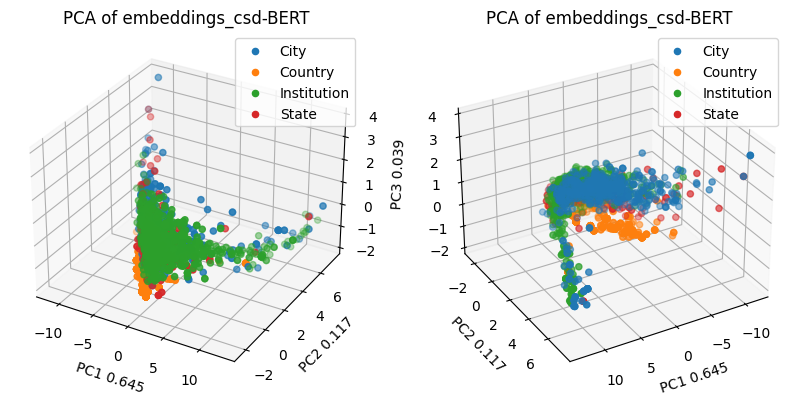

[0.73317694 0.08212794 0.03905523]


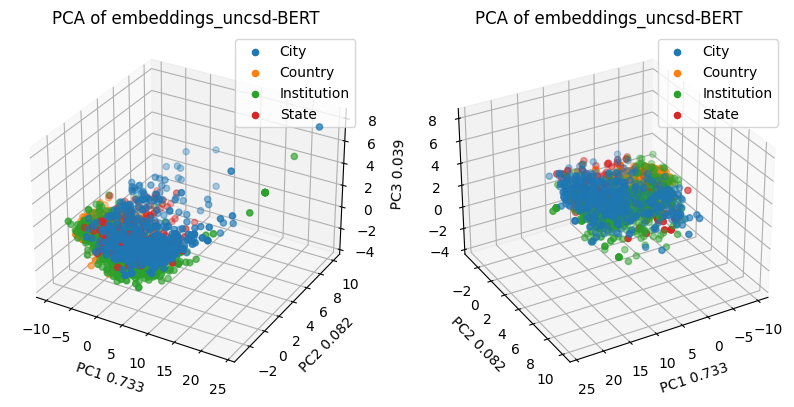

[0.3839008  0.24572597 0.10957123]


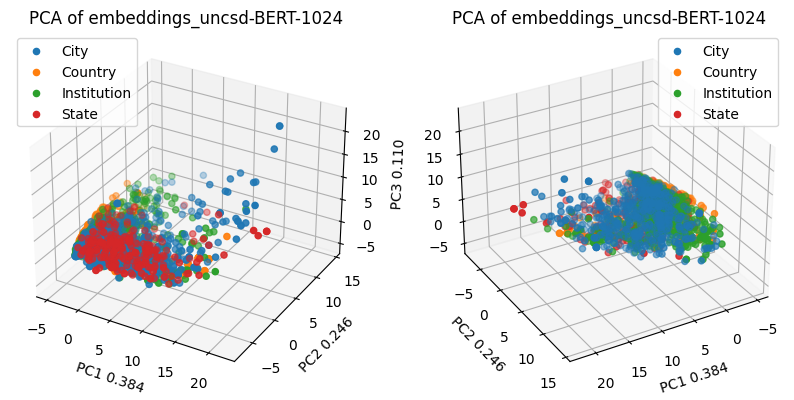

[0.59840989 0.08714558 0.03025867]


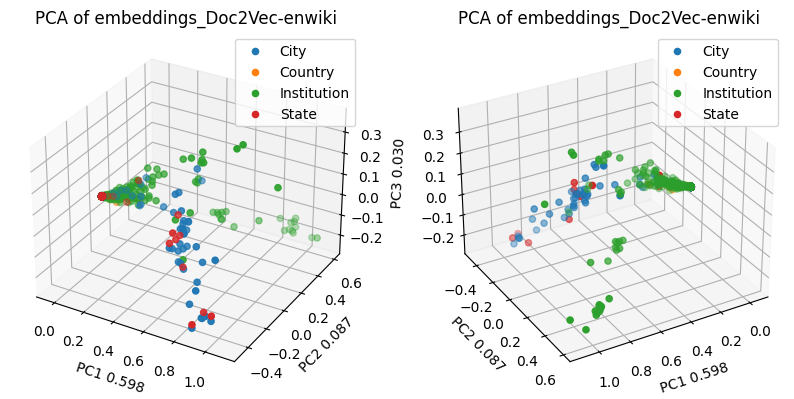

[0.56866862 0.07404831 0.06132024]


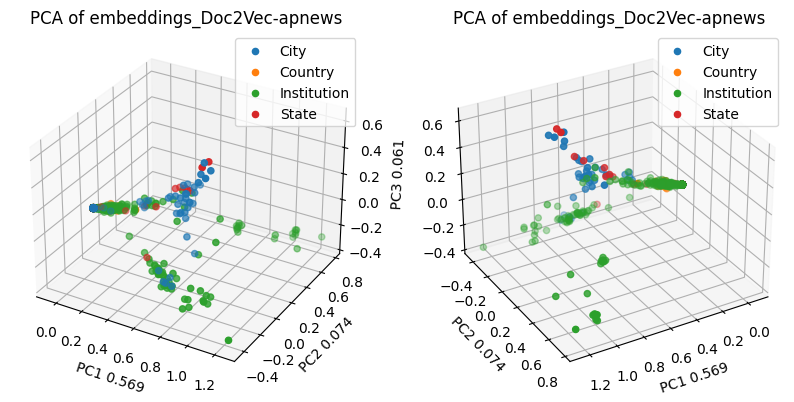

[0.28166157 0.10736471 0.05552959]


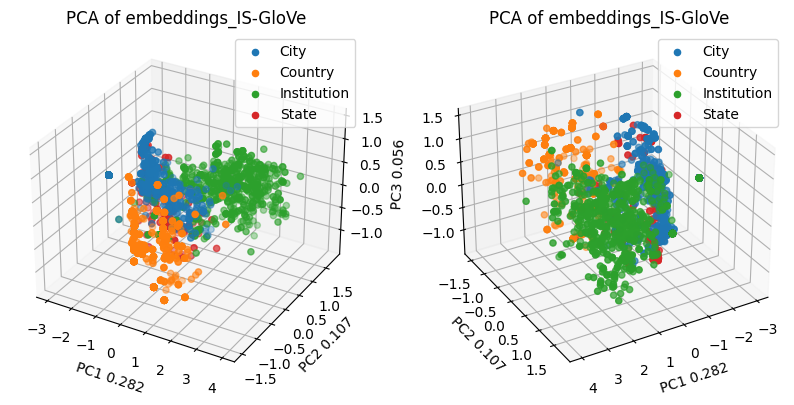

[0.31722632 0.08194219 0.04481394]


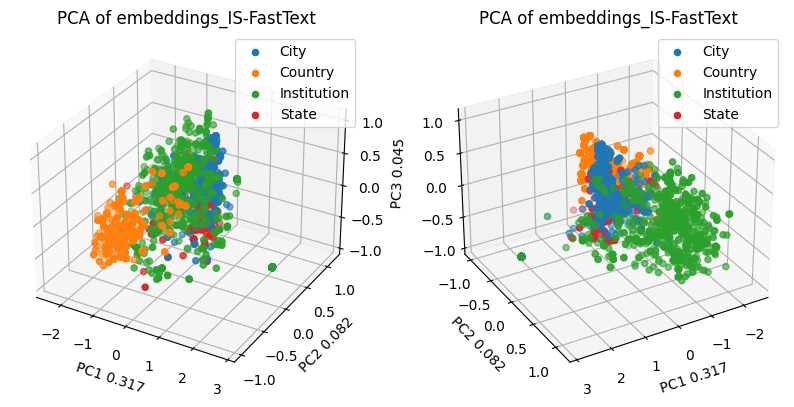

[0.10363993 0.05170481 0.04430569]


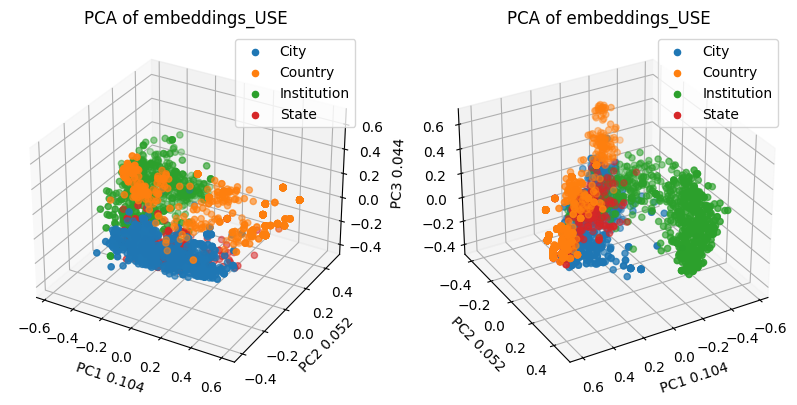

[0.1127286  0.07053033 0.04592365]


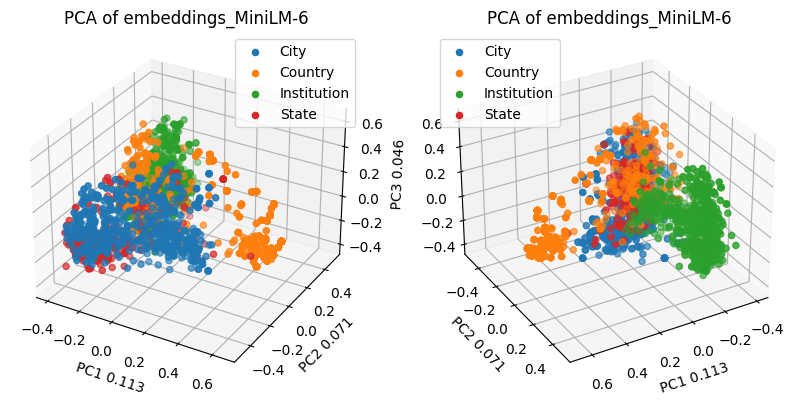

[0.11597142 0.08192418 0.04460035]


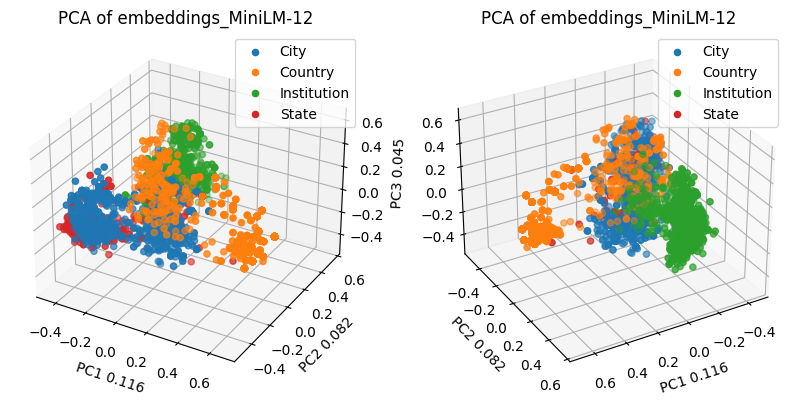

In [6]:
for i, result in enumerate(pca_results):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), subplot_kw={'projection': '3d'})
    
    ax1 = axes[0]
    for label in np.unique(y):
        indices = np.where(y == label)
        ax1.scatter(result[indices, 0],
                   result[indices, 1],
                   result[indices, 2], 
                   label=label)
    print(pcas[i].explained_variance_ratio_)
    ax1.set_xlabel('PC1 %.3f' %round(pcas[i].explained_variance_ratio_[0], 3))
    ax1.set_ylabel('PC2 %.3f' %round(pcas[i].explained_variance_ratio_[1], 3))
    ax1.set_zlabel(' PC3 %.3f' %round(pcas[i].explained_variance_ratio_[2], 3))
    ax1.legend()
    ax1.set_title('PCA of ' + X_list_names[i])
    ax1.view_init(elev=30, azim=-60)

    ax2 = axes[1]
    for label in np.unique(y):
        indices = np.where(y == label)
        ax2.scatter(result[indices, 0],
                   result[indices, 1],
                   result[indices, 2], 
                   label=label)
    ax2.set_xlabel('PC1 %.3f' %round(pcas[i].explained_variance_ratio_[0], 3))
    ax2.set_ylabel('PC2 %.3f' %round(pcas[i].explained_variance_ratio_[1], 3))
    ax2.set_zlabel('')
    ax2.legend()
    ax2.set_title('PCA of ' + X_list_names[i])
    ax2.view_init(elev=30, azim=60)

    plt.savefig('NoNone_PCA-3D' + X_list_names[i] + '.png')
    plt.show() 
    

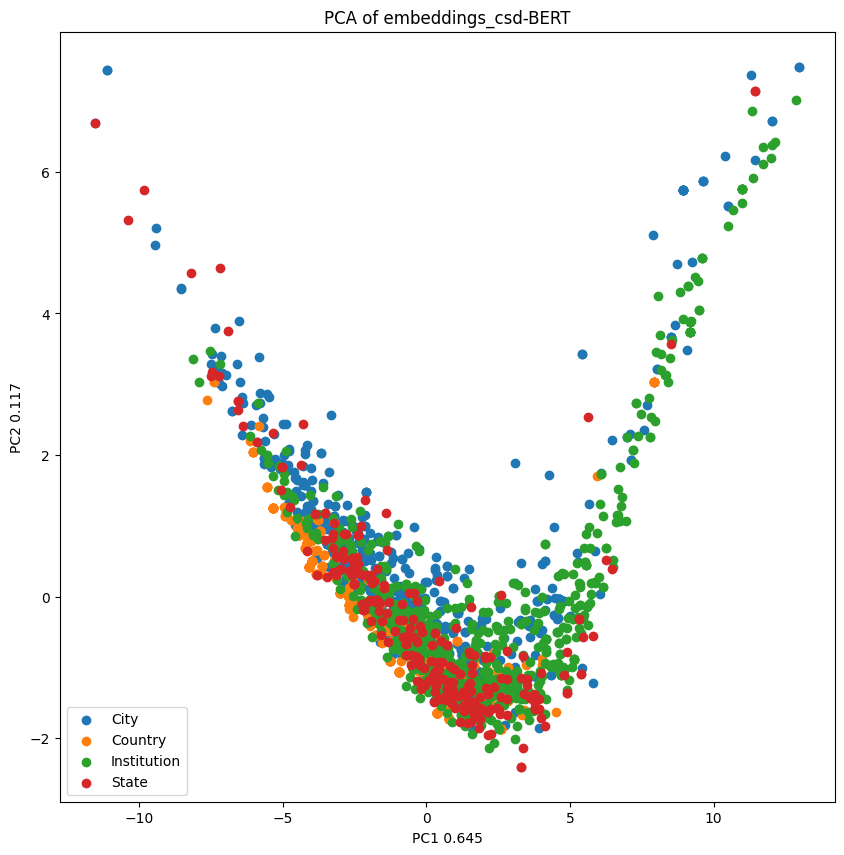

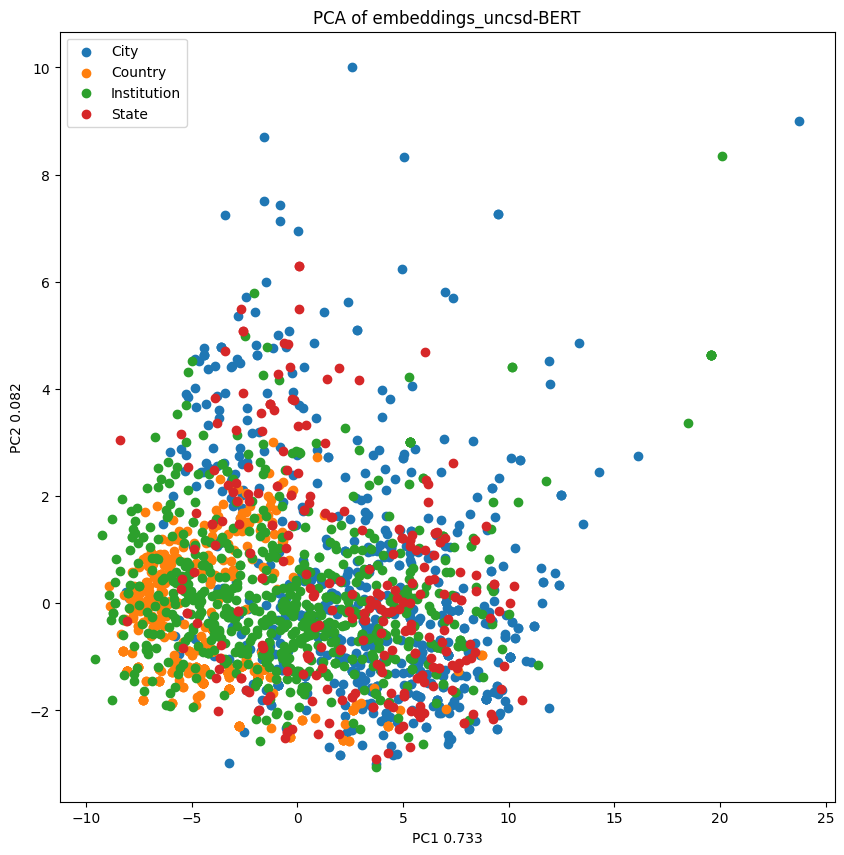

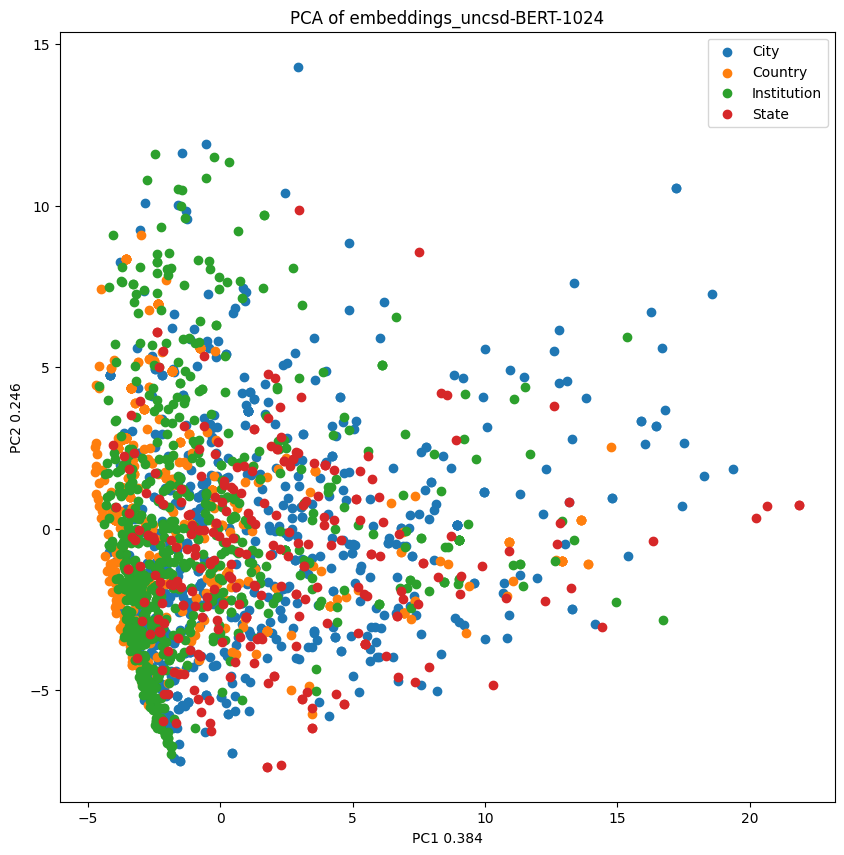

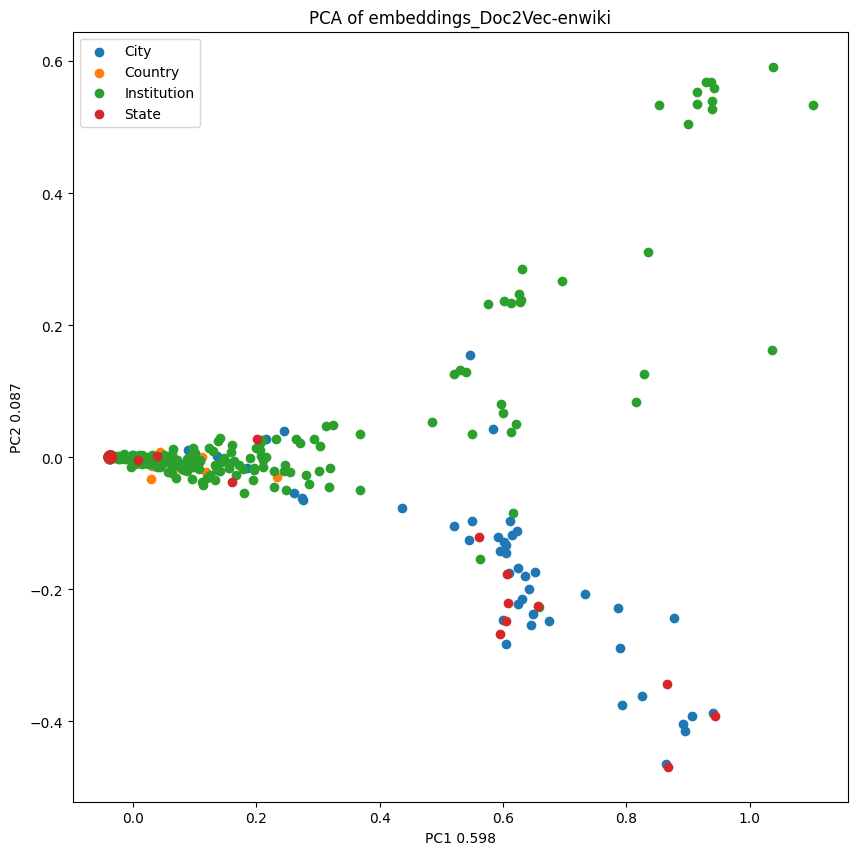

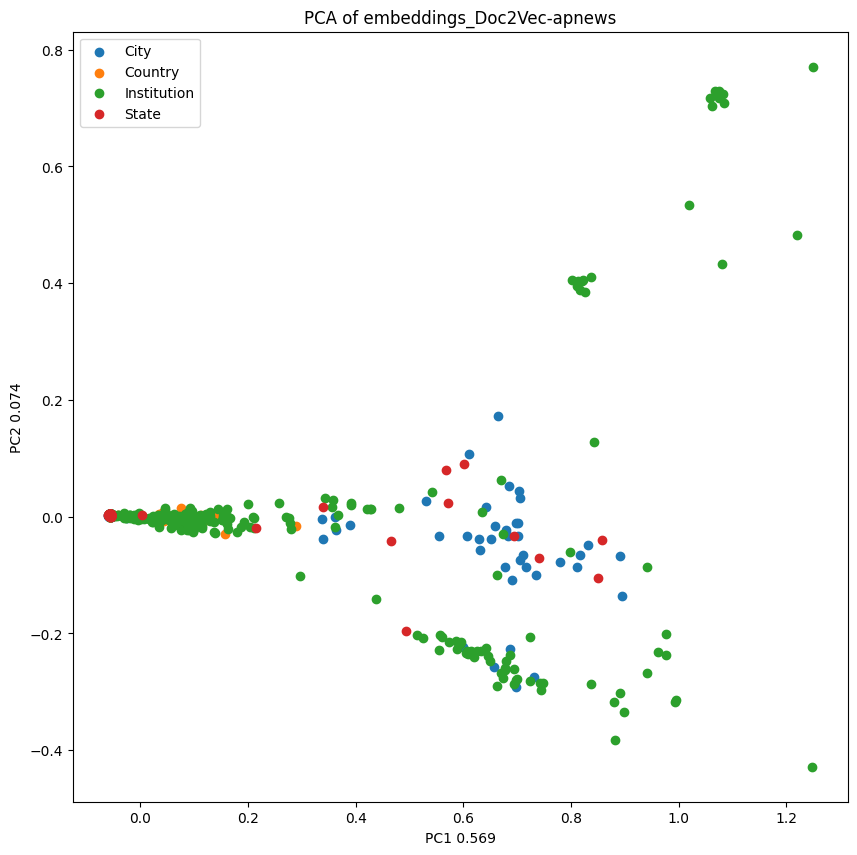

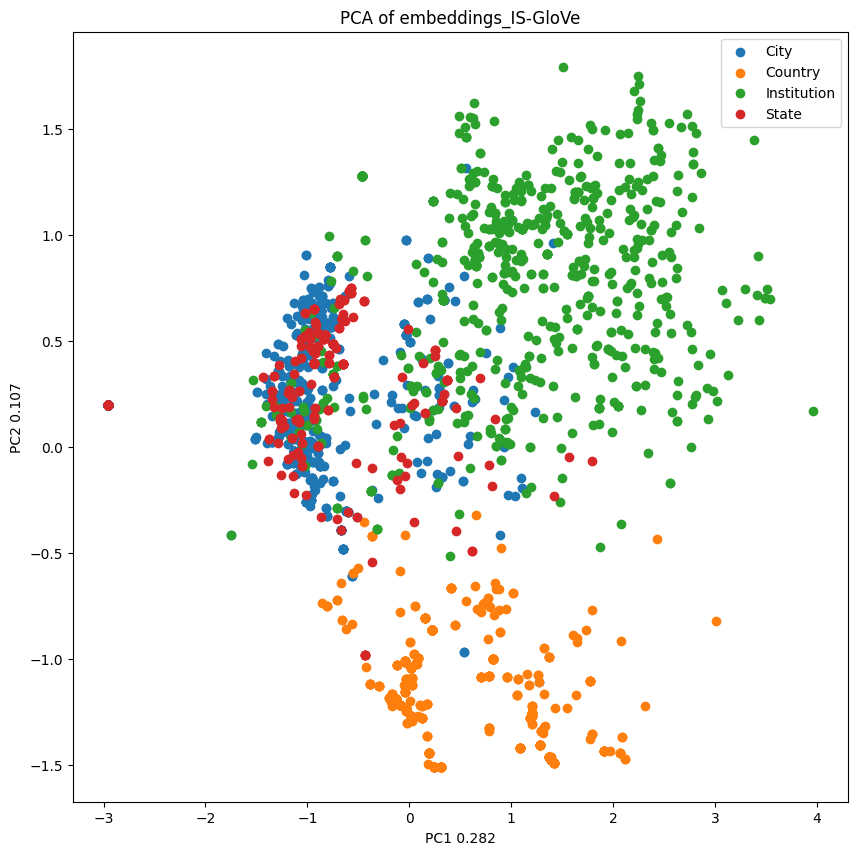

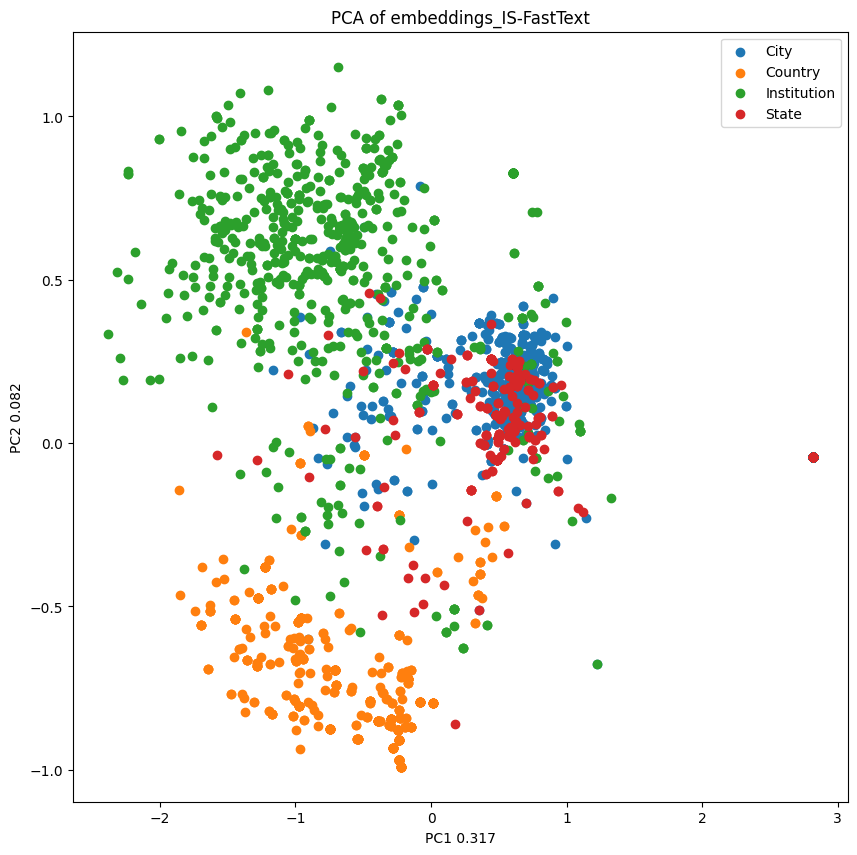

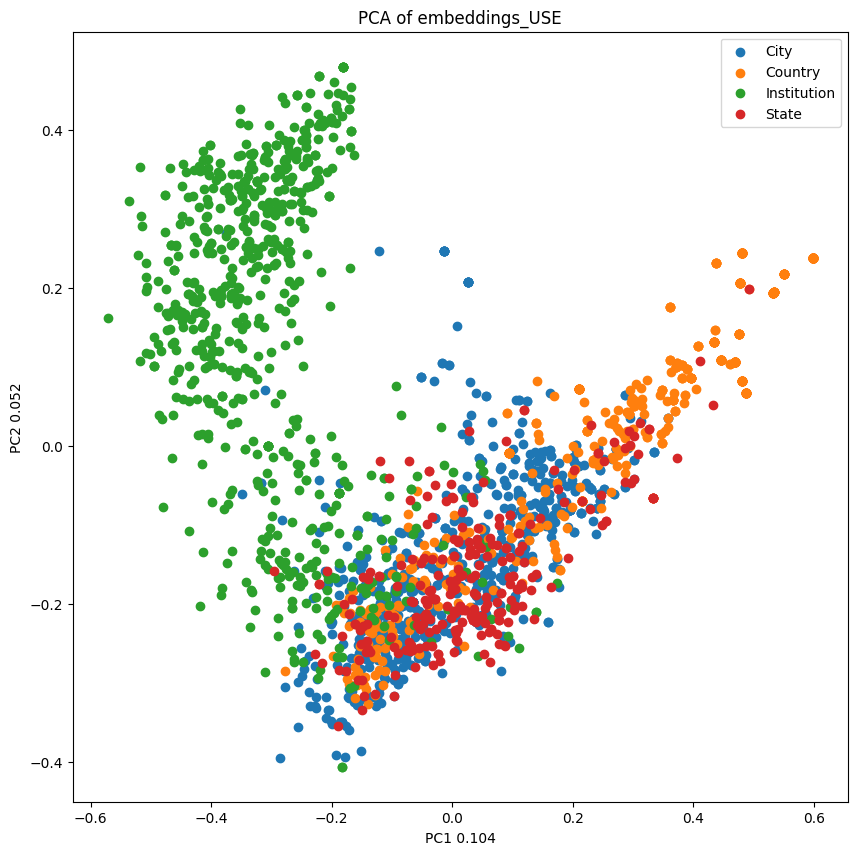

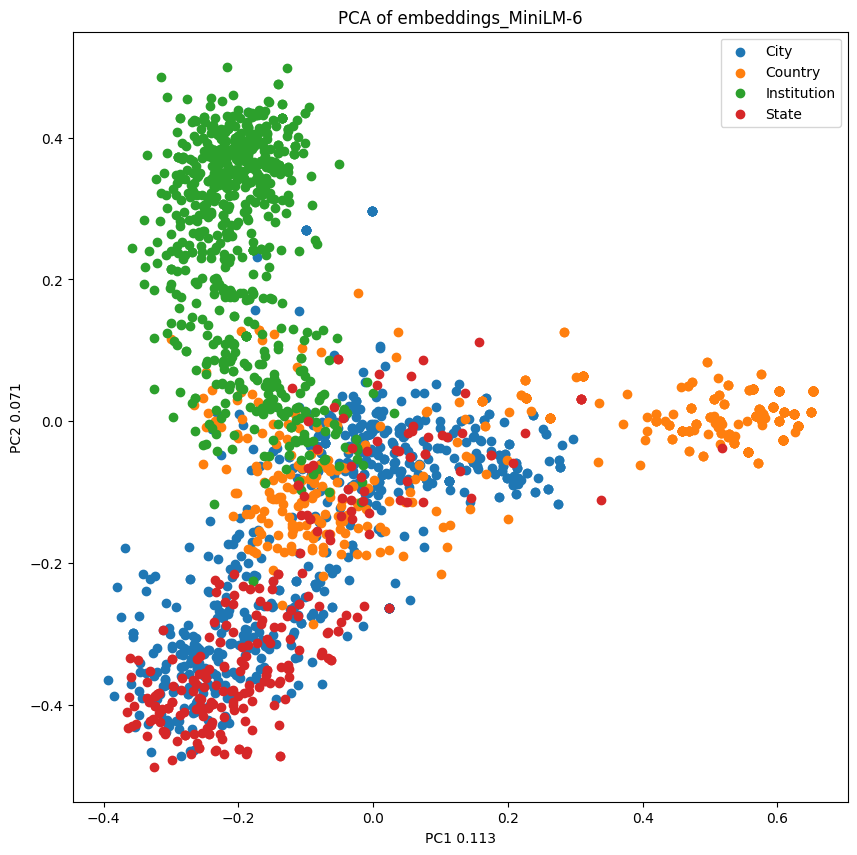

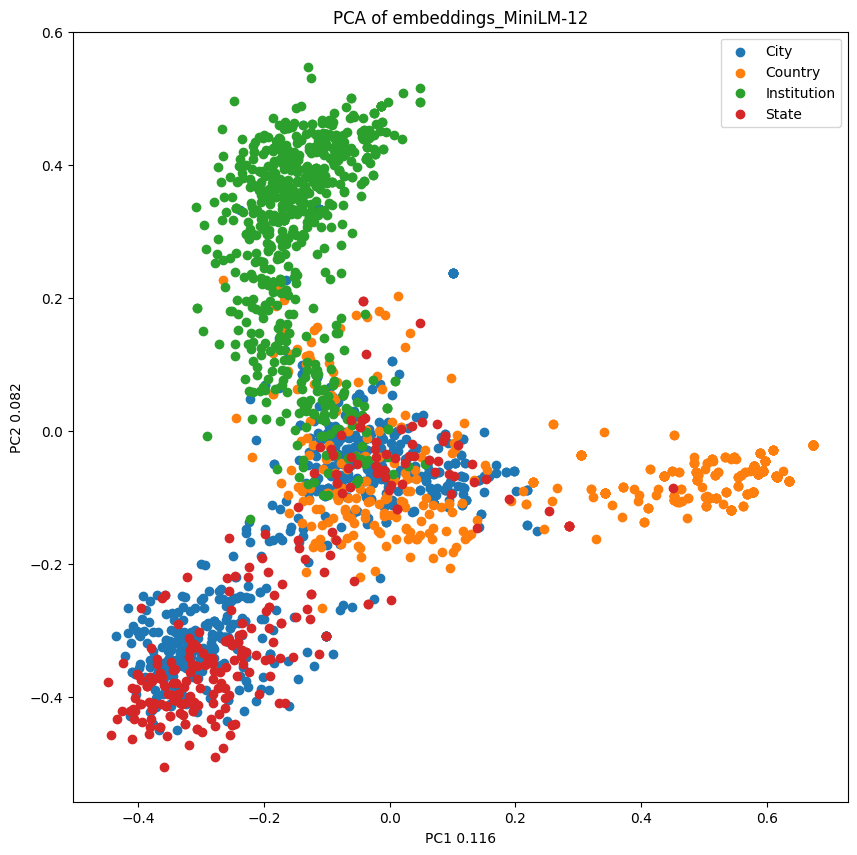

In [7]:
#the same plots but with 2D projection color None transparent grey
for i, result in enumerate(pca_results):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for label in np.unique(y):
        indices = np.where(y == label)
        ax.scatter(result[indices, 0],
                   result[indices, 1],
                   label=label)
    ax.set_xlabel('PC1 %.3f' %round(pcas[i].explained_variance_ratio_[0], 3))
    ax.set_ylabel('PC2 %.3f' %round(pcas[i].explained_variance_ratio_[1], 3))
    ax.legend()
    ax.set_title('PCA of ' + X_list_names[i])
    plt.savefig('NoNonePCA-2D' + X_list_names[i] + '.png')
    plt.show()
    